In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

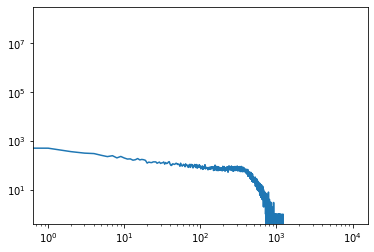

In [15]:
size, amount = np.loadtxt("3D_data.txt", skiprows=1, unpack=True)
#De straal hier was 10
plt.loglog(size, amount)

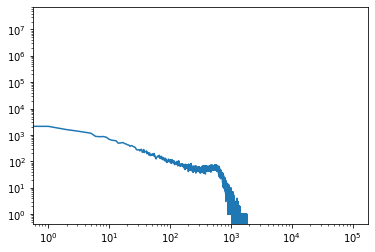

In [5]:
size, amount = np.loadtxt("3D_data.txt" , skiprows=1, unpack=True)
plt.loglog(size, amount)

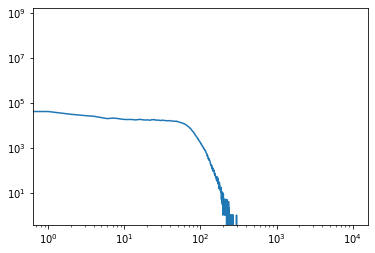

In [14]:
size, amount = np.loadtxt("50x50x50 10 000 r5.txt", skiprows=1, unpack=True)
#de straal hier was 5
plt.loglog(size, amount)

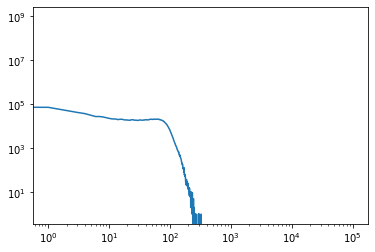

In [3]:
size, amount = np.loadtxt("100000 1000it r5.txt" , skiprows=1, unpack=True)
plt.loglog(size, amount)

Er bestaat een zekere cutoff waarbij de grafiek van het linear regime afwijkt
Deze cutoff is straalafhankelijk
de cutoff is onafhankelijk van de hoeveelheid gebruikte deeltjes